# 라이브러리 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score
from xgboost import plot_importance # 중요변수 시각화

from sklearn.datasets import load_breast_cancer

# 데이터 불러오기

In [2]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df['target_names'] = cancer.target_names[cancer.target]
df.iloc[::100]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
100,13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,0.05871,...,108.60,906.5,0.1265,0.1943,0.3169,0.1184,0.2651,0.07397,0,malignant
200,12.23,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.04107,0.1979,0.06013,...,92.15,638.4,0.1429,0.2042,0.1377,0.1080,0.2668,0.08174,1,benign
300,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,0.1792,0.06552,...,171.10,2053.0,0.1495,0.4116,0.6121,0.1980,0.2968,0.09929,0,malignant
400,17.91,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.11980,0.2113,0.07115,...,149.60,1304.0,0.1873,0.5917,0.9034,0.1964,0.3245,0.11980,0,malignant
500,15.04,16.74,98.73,689.4,0.09883,0.13640,0.07721,0.06142,0.1668,0.06869,...,109.70,856.9,0.1135,0.2176,0.1856,0.1018,0.2177,0.08549,1,benign


데이터 설명
* 가나다라마바사

# 전처리

## 결측치 파악

# 데이터 정제 및 파생변수 생성

## 스케일링

In [4]:
# Tree계열 쓴다면 생략.

## 분할

In [5]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(426, 30) (426,)
(143, 30) (143,)


# 모델 학습

In [6]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
cross_val = cross_validate(estimator=decision_tree_model, X=X_train, y=y_train, cv=5)

print(f"average test score : {cross_val['test_score'].mean()}")

average test score : 0.9365253077975376


In [7]:
rf_model = RandomForestClassifier()
cross_val = cross_validate(estimator=rf_model, X=X_train, y=y_train, cv=5)
print(f"average test score :", cross_val['test_score'].mean())

average test score : 0.9670861833105336


In [8]:
et_model = ExtraTreesClassifier()
cross_val = cross_validate(estimator=et_model, X=X_train, y=y_train, cv=5)
print(f"average test score :", cross_val['test_score'].mean())

average test score : 0.9670588235294119


In [9]:
xgb_model = XGBClassifier()
cross_val = cross_validate(estimator=xgb_model, X=X_train, y=y_train, cv=5)
print(f"average test score :", cross_val['test_score'].mean())

average test score : 0.9670588235294117


In [10]:
# 최종 모델 학습

decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train), decision_tree_model.score(X_test, y_test)

(1.0, 0.958041958041958)

In [11]:
rf_model.fit(X_train, y_train)
rf_model.score(X_train, y_train), rf_model.score(X_test, y_test)

(1.0, 0.965034965034965)

In [12]:
et_model.fit(X_train, y_train)
et_model.score(X_train, y_train), et_model.score(X_test, y_test)

(1.0, 0.965034965034965)

In [13]:
xgb_model.fit(X_train, y_train)
xgb_model.score(X_train, y_train), xgb_model.score(X_test, y_test)

(1.0, 0.965034965034965)

# 해석

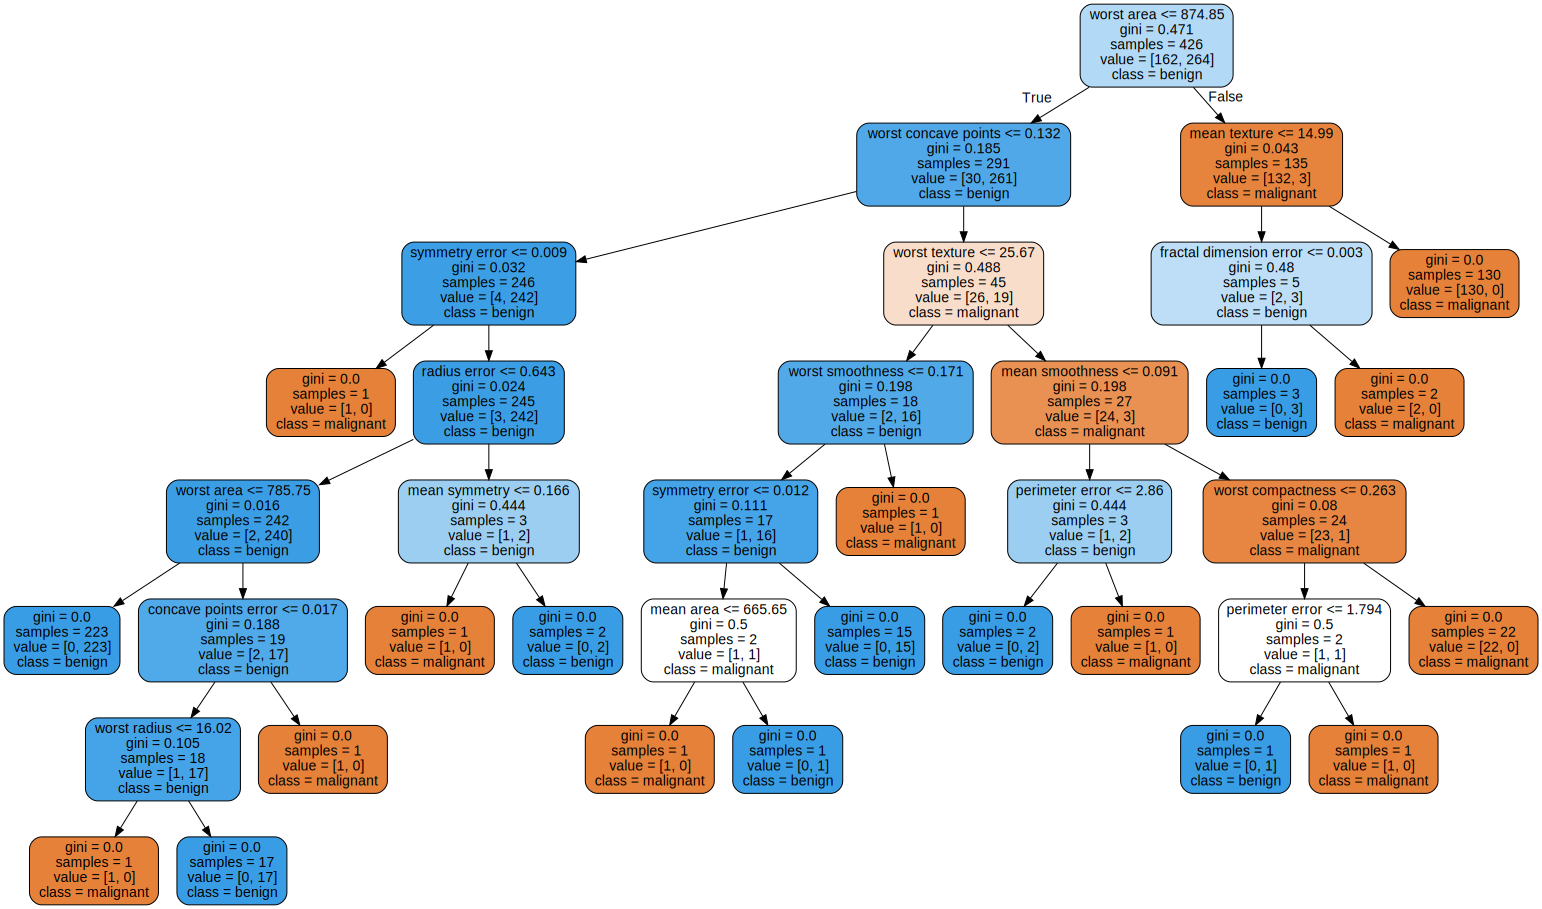

In [15]:
dot_data = export_graphviz(decision_tree=decision_tree_model,
                           feature_names=cancer.feature_names,
                           filled=True,
                           rounded=True,
                           class_names=cancer.target_names
                           )
graph = graphviz.Source(dot_data)
graph

In [16]:
from sklearn.tree import export_text
r = export_text(decision_tree=decision_tree_model, feature_names=list(cancer.feature_names))
print(r)

|--- worst area <= 874.85
|   |--- worst concave points <= 0.13
|   |   |--- symmetry error <= 0.01
|   |   |   |--- class: 0
|   |   |--- symmetry error >  0.01
|   |   |   |--- radius error <= 0.64
|   |   |   |   |--- worst area <= 785.75
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- worst area >  785.75
|   |   |   |   |   |--- concave points error <= 0.02
|   |   |   |   |   |   |--- worst radius <= 16.02
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- worst radius >  16.02
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- concave points error >  0.02
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- radius error >  0.64
|   |   |   |   |--- mean symmetry <= 0.17
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- mean symmetry >  0.17
|   |   |   |   |   |--- class: 1
|   |--- worst concave points >  0.13
|   |   |--- worst texture <= 25.67
|   |   |   |--- worst smoothness <= 0.17
|   |   |   |   |--- symmetry error <= 0.0

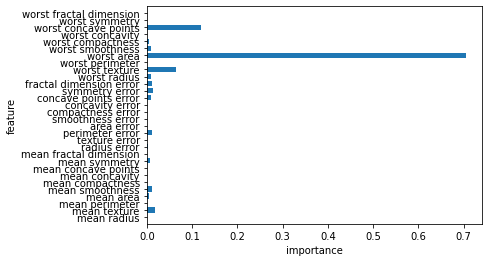

In [17]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(decision_tree_model)

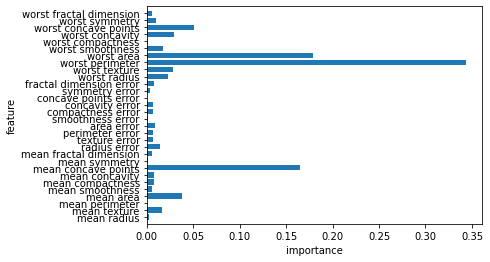

In [18]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(xgb_model)

# 모델 저장

In [20]:
estimator = xgb_model

In [21]:
import pickle

with open('mbti_model.dat', 'wb') as f:  # dat는 그냥 의미없음.   # write binary mode
  pickle.dump(estimator, f)  # 저장하기

In [22]:
with open('mbti_model.dat', 'rb') as f:
  model = pickle.load(f)  # 로드

model.score(X_test, y_test)

0.965034965034965